In [1]:
# imports

import pandas as pd
import matplotlib.pyplot as plt

from scripts.predictor import Predictor, ShingleScore
from scripts.text_preprocessor import TextPreprocessor

In [2]:
# Utils for plotting graph

def plot(p, draw):
    p.figure()
    draw()
    p.show()

In [3]:
# Some constants
input_file = 'tmp/mapred-filtered-100.csv'

In [4]:
# Create a list of predictors

predictors = [Predictor(ignore_warnings=True)]
for shingle_len in range(1, 6):
    predictors.append(Predictor(shingle_len_filter=shingle_len, 
                                ignore_warnings=True))

In [5]:
# Load database

db = pd.read_csv(input_file)
db.sample(n=10)

,score,k,frequency,shingle
2338,5,4,110,almonds good source magnesium
1751,4,3,74,pretty darn good
1643,4,2,554,gave 4
2368,5,4,110,br thats just completely
267,1,3,124,care spending money
761,2,3,31,didnt really like
358,1,4,124,chubby reducing hell hungry
1865,4,4,36,reason im giving 4
1096,3,1,1679,tasted
1960,4,5,34,completing assignments sleep pattern disrupted


In [6]:
# Add shingle scores

for idx, r in db.iterrows():
    shingle_score = ShingleScore(shingle=str(r['shingle']),
                                 score=r['score'],
                                 frequency=r['frequency'])
    for pdtr in predictors:
        pdtr.addShingleScore(shingle_score)

In [7]:
# Load test data

td = pd.read_csv('tmp/processed-30.csv')
td.sample(n=10)

,Score,Text
56445,5,purchased blue diamond wasabi almonds try snac...
19654,4,like brand didnt realize ordering extra bold t...
92531,4,like taste sweetness body doesnt tolerate arti...
68367,5,hardly eat soup not liking soup amazing taste ...
5103,1,open look wonderfullike reeses peanut butter c...
75415,5,organic felt really good making eating waffles...
161045,5,product deliversliterallythe san francisco sou...
93295,5,tried barbeque sea salt vinegar flavors availa...
21478,5,wanted stash earl grey double bergamot tea keu...
118804,5,local stores carried christmas stopped carryin...


In [8]:
# Preprocess the test data

tp = TextPreprocessor()
td['Processed Text'] = td['Text'].apply(lambda t: tp.process(t))
td.sample(n=10)

,Score,Text,Processed Text
2826,5,absorbable form mag citrate best price ive use...,absorbable form mag citrate best price ive use...
18428,5,im milk loverusually buy nonfat milk lowfat mi...,im milk loverusually buy nonfat milk lowfat mi...
18058,5,great instant expresso truly sensationalin cla...,great instant expresso truly sensationalin cla...
48847,5,cheesy hashbrown favorite hamburger helper lon...,cheesy hashbrown favorite hamburger helper lon...
12960,5,doing weight watchers certain foods did not wa...,doing weight watchers certain foods did not wa...
144025,5,buying product 8 years butter flavor true popp...,buying product 8 years butter flavor true popp...
104609,4,dog loves themmolly small cut treats manageabl...,dog loves themmolly small cut treats manageabl...
129497,4,like bars crunch flavor nut bar sugar peanuty ...,like bars crunch flavor nut bar sugar peanuty ...
66725,2,reviewers noted weak coffee rave ive tried box...,reviewers noted weak coffee rave ive tried box...
112545,5,span classtiny length 908 minsbr br spanwhile ...,span classtiny length 908 minsbr br spanwhile ...


In [9]:
# Test the predictors

for idx, pdtr in enumerate(predictors):
    print('Testing Predictor {}...'.format(idx))
    td['Predictor {} Score'.format(idx)] = td['Processed Text'].apply(lambda t: pdtr.predict(t))

Testing Predictor 0...
Testing Predictor 1...
Testing Predictor 2...
Testing Predictor 3...
Testing Predictor 4...
Testing Predictor 5...


In [10]:
td.sample(n=10)

,Score,Text,Processed Text,Predictor 0 Score,Predictor 1 Score,Predictor 2 Score,Predictor 3 Score,Predictor 4 Score,Predictor 5 Score
127827,5,absolutely love productthe cats enjoy hairball...,absolutely love productthe cats enjoy hairball...,4.742889,4.485777,5.000000,3.0,3.0,3.0
37559,5,using product years hard great sugar substitue,using product years hard great sugar substitue,4.247159,4.247159,3.000000,3.0,3.0,3.0
42443,5,candies delicious happy available bulk highly ...,candies delicious happy available bulk highly ...,4.730705,4.532863,4.928547,3.0,3.0,3.0
160773,4,dont let baristas fool not good freshbrewed st...,dont let baristas fool not good freshbrewed st...,3.201665,3.965040,2.438290,3.0,3.0,3.0
133303,5,enjoyed coffee brand recognizing kind coffee h...,enjoyed coffee brand recognizing kind coffee h...,4.091360,4.091360,3.000000,3.0,3.0,3.0
24970,3,purchased small container convenient large soy...,purchased small container convenient large soy...,3.958614,3.958614,3.000000,3.0,3.0,3.0
12493,5,looking warm wash lunch clients office unfamil...,looking warm wash lunch clients office unfamil...,4.218462,4.195199,4.241725,3.0,3.0,3.0
41429,5,arrived quickly undamaged described probably n...,arrived quickly undamaged described probably n...,3.461036,3.922071,3.000000,3.0,3.0,3.0
56282,3,theres bob marley coffee packets brewing instr...,theres bob marley coffee packets brewing instr...,4.098070,4.116626,4.079514,3.0,3.0,3.0
134830,5,best popcorn everjust like movies love popcorn...,best popcorn everjust like movies love popcorn...,4.270611,4.270611,3.000000,3.0,3.0,3.0


In [11]:
tdd = td.drop(['Text', 'Processed Text'], axis=1)
tdd.sample(n=10)

,Score,Predictor 0 Score,Predictor 1 Score,Predictor 2 Score,Predictor 3 Score,Predictor 4 Score,Predictor 5 Score
48169,1,4.393747,3.934161,4.853333,3.000000,3.0,3.0
72484,5,4.125653,4.125653,3.000000,3.000000,3.0,3.0
142135,5,4.286225,4.017323,4.555127,3.000000,3.0,3.0
88786,5,4.473812,4.029537,4.515566,4.876333,3.0,3.0
124431,4,4.028118,4.028118,3.000000,3.000000,3.0,3.0
158996,5,4.293795,4.166944,4.420646,3.000000,3.0,3.0
121396,3,4.050203,4.050203,3.000000,3.000000,3.0,3.0
101141,1,4.012109,3.903667,4.120551,3.000000,3.0,3.0
106324,5,4.543674,4.126460,4.787860,4.716702,3.0,3.0
136594,2,2.732716,3.922585,1.542846,3.000000,3.0,3.0


In [12]:
for idx in range(6):
    from_column = 'Predictor {} Score'.format(idx)
    to_column = 'Predictor {} Score Error'.format(idx)
    tdd[to_column] = tdd[from_column] - tdd['Score']
    tdd = tdd.drop([from_column], axis=1)

tdd.sample(n=10)

,Score,Predictor 0 Score Error,Predictor 1 Score Error,Predictor 2 Score Error,Predictor 3 Score Error,Predictor 4 Score Error,Predictor 5 Score Error
8680,5,-1.106585,-0.782339,-1.430830,-2.000000,-2.0,-2.0
170199,1,1.503750,3.007501,0.000000,2.000000,2.0,2.0
134771,5,-0.455027,-0.910054,0.000000,-2.000000,-2.0,-2.0
90093,5,-0.900764,-0.797017,-1.004510,-2.000000,-2.0,-2.0
49188,1,1.525177,2.937285,0.113069,2.000000,2.0,2.0
69629,5,-0.433522,-0.867045,0.000000,-2.000000,-2.0,-2.0
170528,5,-0.842695,-0.842695,-2.000000,-2.000000,-2.0,-2.0
105576,5,-0.716976,-0.761290,-0.672663,-2.000000,-2.0,-2.0
92510,5,-0.693707,-1.003110,-0.481613,-0.596398,-2.0,-2.0
98458,5,-0.514973,-0.958494,-0.071453,-2.000000,-2.0,-2.0


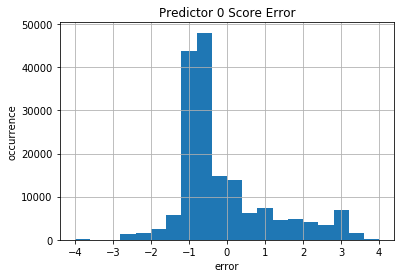

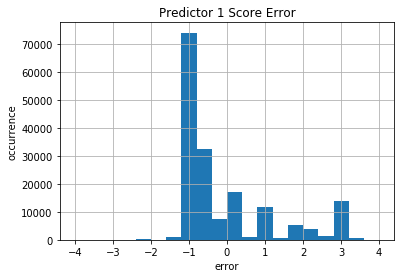

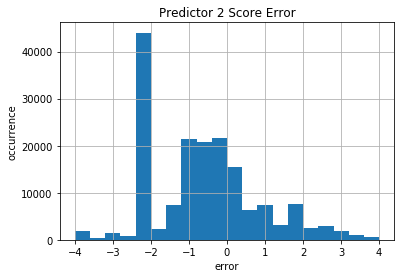

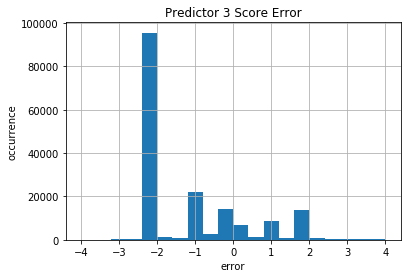

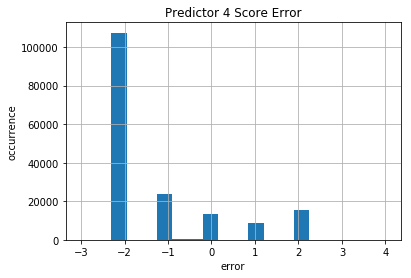

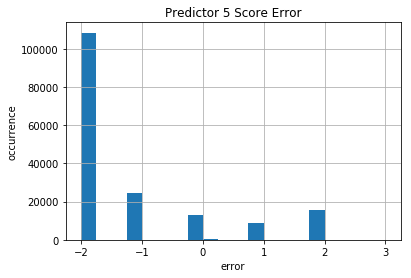

In [13]:
def plot_hists(p):
    for idx in range(6):
        p.figure()
        col = 'Predictor {} Score Error'.format(idx)
        title = 'Predictor {} Score'.format(idx)
        tdd[col].hist(bins=20)
        p.title(col)
        p.xlabel('error')
        p.ylabel('occurrence')
        p.show()

plot_hists(plt)